In [1]:
# import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Read the data:

df = pd.read_csv('sheet2.csv',sep = ',')
print(df)

          obs
0   54.507318
1   52.183131
2   59.587585
3   52.951728
4   53.302821
5   54.383157
6   55.394090
7   59.637172
8   53.811463
9   52.035259
10  53.763910
11  59.488890
12  56.798223
13  55.727858
14  54.434550
15  55.162684
16  51.287706
17  54.884016
18  50.340227
19  51.009715
20  53.006514
21  52.653531
22  56.323987
23  51.467548
24  56.900738
25  58.482138
26  57.659965
27  57.974599
28  52.115398
29  55.079462
30  50.647267
31  59.547734
32  53.077537
33  53.323793
34  59.695597
35  55.575524
36  51.640132
37  58.677772
38  56.789595
39  56.842751
40  52.427073
41  54.723054
42  55.294794
43  57.131708
44  55.607499
45  53.664759
46  57.620416
47  55.473823
48  55.249491
49  50.888293


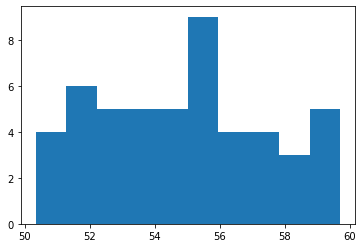

In [3]:
# plot the histogram

plt.hist(df['obs'])
plt.show()

In [4]:
# observations:

'''
The histogram shows one peak and peak on other sides but shows no exact symmetric nature or step wise decrease
Its non-gaussian
somewhat symmetric
'''

'\nThe histogram shows one peak and peak on other sides but shows no exact symmetric nature or step wise decrease\nIts non-gaussian\nsomewhat symmetric\n'

In [5]:
# lets see the Descriptive statistics

df.describe()

,obs
count,50.000000
mean,54.925080
std,2.659768
min,50.340227
25%,52.965425
50%,54.981739
75%,56.831619
max,59.695597


In [6]:
stats_labels = ['Mean_Observed', 'Variance_observed', 'skew_observed', 'kurt_observed']
stats_values = [round(df['obs'].mean(),2), round(df['obs'].var(),2), round(df['obs'].skew(),2),round(df['obs'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))

{('Mean_Observed', 54.93), ('Variance_observed', 7.07), ('kurt_observed', -0.87), ('skew_observed', 0.18)}


In [7]:
df.median()

obs    54.981739
dtype: float64

In [8]:
# Observations:

'''
The mean and median are almost close to each other. 
min and max range from 50-59
Looks like a normal distribution
Also the bins of range 2
variance is very small
From these statistics we can say its almost uniform

Based on kurtosis: -0.87. For normal the kurtosis is around 3 and less than 3 cant be normal
Reinforces the judgement that its not a Normal
skewness:  0.18 Very low. Not skewed to either side its centered
Looking at split accross quantiles> mean of 55

So looks like uniform from 50 and 60

'''

'\nThe mean and median are almost close to each other. \nmin and max range from 50-59\nLooks like a normal distribution\nAlso the bins of range 2\nvariance is very small\nFrom these statistics we can say its almost uniform\n\nBased on kurtosis: -0.87. For normal the kurtosis is around 3 and less than 3 cant be normal\nReinforces the judgement that its not a Normal\nskewness:  0.18 Very low. Not skewed to either side its centered\nLooking at split accross quantiles> mean of 55\n\nSo looks like uniform from 50 and 60\n\n'

In [10]:
# lets plot the q-q plot:

import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, uniform, poisson
from statsmodels.graphics.gofplots import qqplot

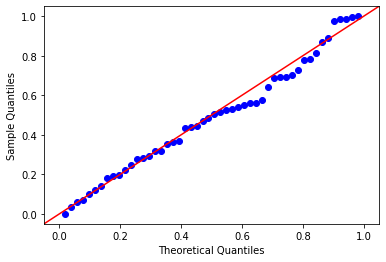

In [11]:
sm.qqplot(df['obs'], stats.uniform, fit = True, line = '45')
plt.show()

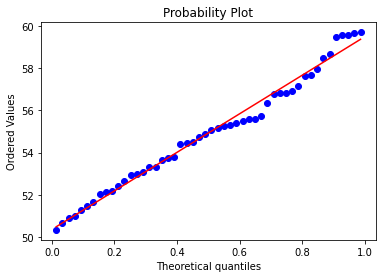

In [12]:
# lets plot the p-p plot:

import scipy.stats as stats
stats.probplot(df['obs'], dist = 'uniform', plot = plt)
plt.show()

In [13]:
# Null Hypothesis: Given data follows uniform distribution
# Alternate Hypothesis: Given data doesn't follow uniform distribution

In [15]:
# Create a new colum of exp freq:

df['expected'] = df['obs'].mean()
print(df)

          obs  expected
0   54.507318  54.92508
1   52.183131  54.92508
2   59.587585  54.92508
3   52.951728  54.92508
4   53.302821  54.92508
5   54.383157  54.92508
6   55.394090  54.92508
7   59.637172  54.92508
8   53.811463  54.92508
9   52.035259  54.92508
10  53.763910  54.92508
11  59.488890  54.92508
12  56.798223  54.92508
13  55.727858  54.92508
14  54.434550  54.92508
15  55.162684  54.92508
16  51.287706  54.92508
17  54.884016  54.92508
18  50.340227  54.92508
19  51.009715  54.92508
20  53.006514  54.92508
21  52.653531  54.92508
22  56.323987  54.92508
23  51.467548  54.92508
24  56.900738  54.92508
25  58.482138  54.92508
26  57.659965  54.92508
27  57.974599  54.92508
28  52.115398  54.92508
29  55.079462  54.92508
30  50.647267  54.92508
31  59.547734  54.92508
32  53.077537  54.92508
33  53.323793  54.92508
34  59.695597  54.92508
35  55.575524  54.92508
36  51.640132  54.92508
37  58.677772  54.92508
38  56.789595  54.92508
39  56.842751  54.92508
40  52.427073  5

In [16]:
# import chi

from scipy.stats import chisquare

In [17]:
chisquare(df['obs'],df['expected'])

Power_divergenceResult(statistic=6.311215146097782, pvalue=0.9999999999999735)

In [18]:
# pvalue is huge and infact suggest that null hypothesis is not rejected

In [19]:
# p for uniform distribution is zero
# thus dof = k-p-1 = 50-1 = 49
# confidence interval of 0.95
# alpha = 0.05

# calculate the tabulated chi2 value
from scipy.stats import chi2
chi2.ppf(0.95, 49)

66.3386488629688

In [20]:
#tabulated value(66.33) > computed value(6.31)
# we do not reject the null 